In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import os


# 1- Load data 

In [142]:
data_dir = '../data'

#Load data
hospital_latest = pd.read_csv(os.path.join(data_dir, 'donnees-hospitalieres-covid19-2020-05-05-19h00.csv'),
                              sep=';')

tests_depistage_latest = pd.read_csv(os.path.join(data_dir, 'donnees-tests-covid19-labo-quotidien-2020-05-06-19h00.csv'),
                             sep=';')

#Load Metadata
age_metadata = pd.read_csv(os.path.join(data_dir, 'code-tranches-dage.csv'),
                              sep=';')

hospital_metadata = pd.read_csv(os.path.join(data_dir, 'metadonnees-donnees-hospitalieres-covid19.csv'),
                              sep=';')

gender_metadata = pd.read_csv(os.path.join(data_dir, 'metadonnees-sexe.csv'),
                              sep=';')

tests_depistage_metadata = pd.read_csv(os.path.join(data_dir, 'metadonnees-tests-depistage-covid19.csv'),
                              sep=';')



# 2- Check the decoration 

In [143]:
hospital_latest.head()

,dep,sexe,jour,hosp,rea,rad,dc
0,01,0,2020-03-18,2,0,1,0
1,01,1,2020-03-18,1,0,1,0
2,01,2,2020-03-18,1,0,0,0
3,02,0,2020-03-18,41,10,18,11
4,02,1,2020-03-18,19,4,11,6


In [144]:
hospital_metadata[['Colonne', 'Description_FR']]

,Colonne,Description_FR
0,dep,Département
1,sexe,Sexe
2,jour,Date de notification
3,hosp,Nombre de personnes actuellement hospitalisées
4,rea,Nombre de personnes actuellement en réanimatio...
5,rad,Nombre cumulé de personnes retournées à domicile
6,dc,Nombre cumulé de personnes décédées à l'hôpital


In [145]:
tests_depistage_latest.head()

,dep,jour,clage_covid,nb_test,nb_pos,nb_test_h,nb_pos_h,nb_test_f,nb_pos_f
0,01,2020-03-10,0,0,0,0,0,0,0
1,01,2020-03-10,A,0,0,0,0,0,0
2,01,2020-03-10,B,0,0,0,0,0,0
3,01,2020-03-10,C,0,0,0,0,0,0
4,01,2020-03-10,D,0,0,0,0,0,0


In [146]:
tests_depistage_metadata[['Colonne','Description_FR']]

,Colonne,Description_FR
0,dep,Département
1,jour,Date de notification
2,clage_covid,Tranche d'âge des patients
3,nb_test,Nombre de tests pour recherche de SARS-CoV-2
4,nb_pos,Nombre de tests positifs pour recherche de SAR...
5,tx_pos,Taux de tests positif pour recherche de SARS-C...
6,nb_test_h,Nombre de tests pour recherche de SARS-CoV-2 -...
7,nb_pos_h,Nombre de tests positifs pour recherche de SAR...
8,nb_test_f,Nombre de tests pour recherche de SARS-CoV-2 -...
9,nb_pos_f,Nombre de tests positifs pour recherche de SAR...


In [147]:
age_metadata

,Code tranches d'age,Unnamed: 1
0,0,tous âges
1,A,moins de 15 ans
2,B,15-44 ans
3,C,45-64 ans
4,D,65-74 ans
5,E,75 et plus


In [148]:
gender_metadata

,Code,Sexe
0,0,femmes + hommes
1,1,hommes
2,2,femmes


In [149]:
hospital_latest.dtypes
#dep type object rather then int

dep     object
sexe     int64
jour    object
hosp     int64
rea      int64
rad      int64
dc       int64
dtype: object

In [150]:
#convert dep to int 
hospital_latest['dep']=pd.to_numeric(hospital_latest['dep'],errors='coerce').convert_dtypes()

In [151]:
tests_depistage_latest.dtypes
#dep type object rather then int

dep            object
jour           object
clage_covid    object
nb_test         int64
nb_pos          int64
nb_test_h       int64
nb_pos_h        int64
nb_test_f       int64
nb_pos_f        int64
dtype: object

In [152]:
#convert dep to int 
tests_depistage_latest['dep']=pd.to_numeric(tests_depistage_latest['dep'],errors='coerce').convert_dtypes()

# 3 - Analysing data 

In [153]:
hospital_latest.describe()

,dep,sexe,hosp,rea,rad,dc
count,14553.000000,14850.000000,14850.000000,14850.000000,14850.000000,14850.000000
mean,95.010101,1.000000,157.342357,31.414074,167.986465,55.095825
std,204.300851,0.816524,300.362171,64.017471,335.232762,120.594982
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.000000,0.000000,19.000000,3.000000,15.000000,3.000000
50%,51.000000,1.000000,52.000000,10.000000,50.000000,14.000000
75%,76.000000,2.000000,142.000000,29.000000,161.000000,47.000000
max,976.000000,2.000000,3281.000000,855.000000,4341.000000,1542.000000


In [154]:
tests_depistage_latest.describe()

,dep,nb_test,nb_pos,nb_test_h,nb_pos_h,nb_test_f,nb_pos_f
count,32670.000000,33330.000000,33330.000000,33330.000000,33330.000000,33330.000000,33330.000000
mean,95.010101,16.125503,2.245395,5.122172,0.787069,10.991869,1.457546
std,204.296958,61.872240,9.212110,19.768745,3.389343,42.660953,6.055933
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,51.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,76.000000,8.000000,1.000000,3.000000,0.000000,5.000000,0.000000
max,976.000000,2380.000000,216.000000,668.000000,84.000000,1732.000000,144.000000


In [155]:
#missing data
def miss_values(data) :
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

In [156]:
miss_values(hospital_latest)

,Total,Percent
dep,297,0.02
dc,0,0.00
rad,0,0.00
rea,0,0.00
hosp,0,0.00
jour,0,0.00
sexe,0,0.00


In [157]:
hospital_latest = hospital_latest.dropna(axis=0, subset=['dep'])
hospital_latest.isnull().sum().max()

0

In [158]:
miss_values(tests_depistage_latest)

,Total,Percent
dep,660,0.019802
nb_pos_f,0,0.000000
nb_test_f,0,0.000000
nb_pos_h,0,0.000000
nb_test_h,0,0.000000
nb_pos,0,0.000000
nb_test,0,0.000000
clage_covid,0,0.000000
jour,0,0.000000


In [159]:
tests_depistage_latest = tests_depistage_latest.dropna(axis=0, subset=['dep'])
tests_depistage_latest.isnull().sum().max()

0

# 3.1 Analysing 'hospitalisation'

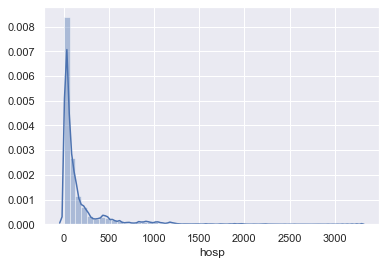

In [160]:
sns.distplot(hospital_latest['hosp'])
#we have a long Tails that we should eliminate 

In [161]:
#skewness and kurtosis
print("Skewness: %f" % hospital_latest['hosp'].skew())
print("Kurtosis: %f" % hospital_latest['hosp'].kurt())

Skewness: 4.233539
Kurtosis: 24.451052


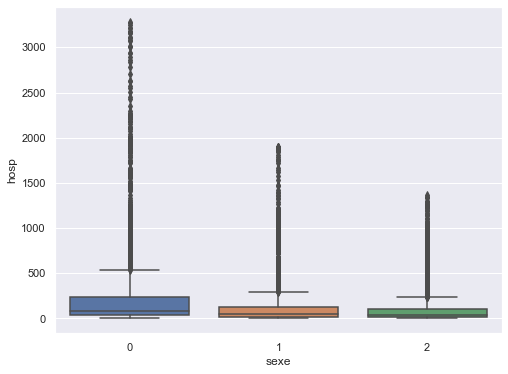

In [162]:
#box plot sexe/hosp
var = 'sexe'
data = pd.concat([hospital_latest['hosp'], hospital_latest[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="hosp", data=data)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98]),
 <a list of 99 Text xticklabel objects>)

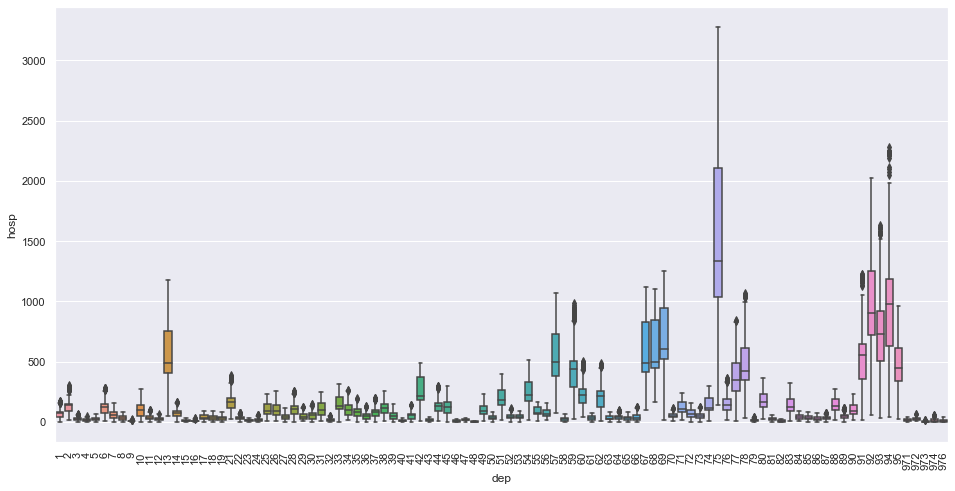

In [163]:
var = 'dep'
data = pd.concat([hospital_latest['hosp'], hospital_latest[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="hosp", data=data)
plt.xticks(rotation=90)

# 3.2 Analysing 'Reanimation'

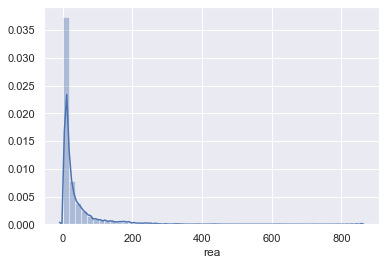

In [164]:
sns.distplot(hospital_latest['rea'])
#we have a long Tails that we should eliminate 

In [165]:
#skewness and kurtosis
print("Skewness: %f" % hospital_latest['rea'].skew())
print("Kurtosis: %f" % hospital_latest['rea'].kurt())

Skewness: 5.260202
Kurtosis: 41.078118


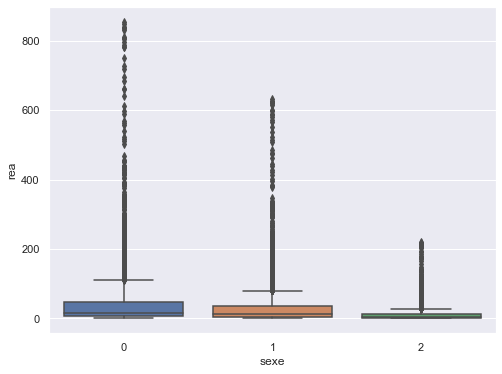

In [166]:
#box plot sexe/rea
var = 'sexe'
data = pd.concat([hospital_latest['rea'], hospital_latest[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="rea", data=data)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98]),
 <a list of 99 Text xticklabel objects>)

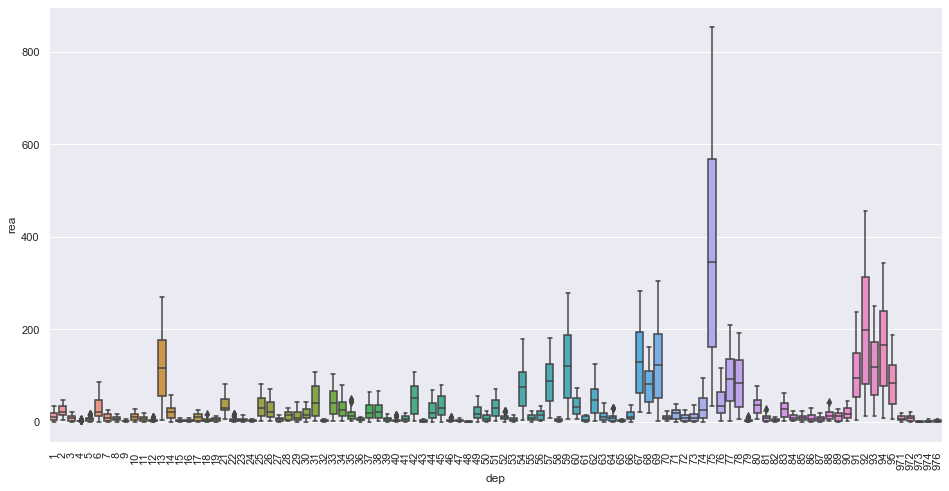

In [167]:
var = 'dep'
data = pd.concat([hospital_latest['rea'], hospital_latest[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="rea", data=data)
plt.xticks(rotation=90)

# 3.3 Analysing 'Returned home'

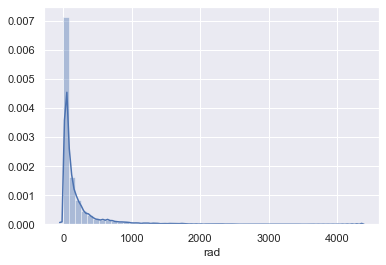

In [168]:
sns.distplot(hospital_latest['rad'])
#we have a long Tails that we should eliminate 

In [169]:
#skewness and kurtosis
print("Skewness: %f" % hospital_latest['rad'].skew())
print("Kurtosis: %f" % hospital_latest['rad'].kurt())

Skewness: 4.502401
Kurtosis: 28.646788


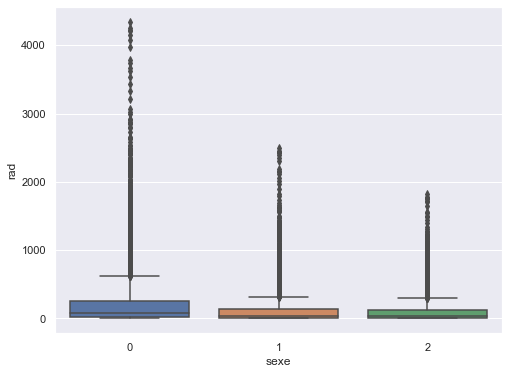

In [170]:
#box plot sexe/rad
var = 'sexe'
data = pd.concat([hospital_latest['rad'], hospital_latest[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="rad", data=data)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98]),
 <a list of 99 Text xticklabel objects>)

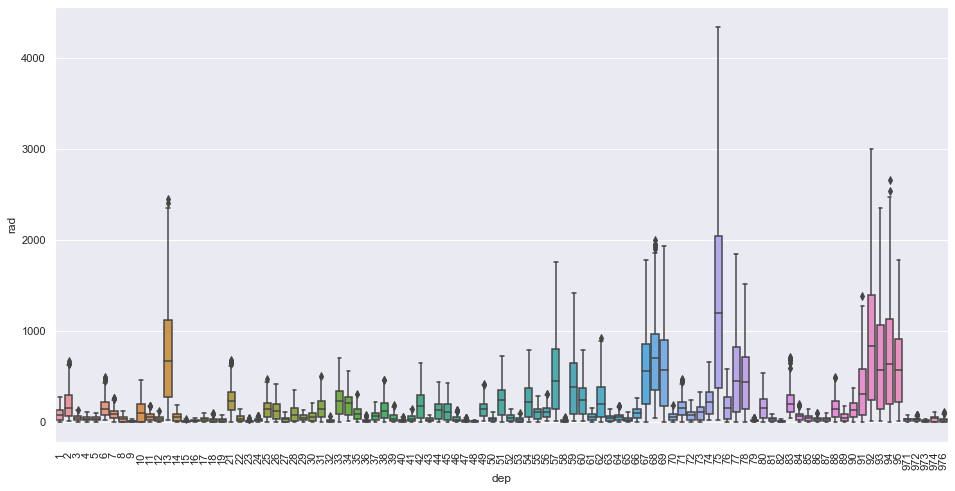

In [171]:
var = 'dep'
data = pd.concat([hospital_latest['rad'], hospital_latest[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="rad", data=data)
plt.xticks(rotation=90)

# 3.3 Analysing 'Death'

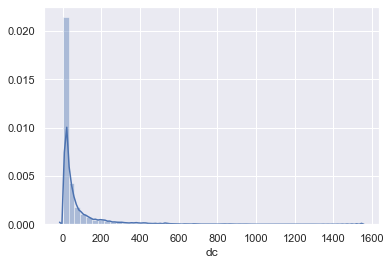

In [172]:
sns.distplot(hospital_latest['dc'])
#we have a long Tails that we should eliminate 

In [173]:
#skewness and kurtosis
print("Skewness: %f" % hospital_latest['dc'].skew())
print("Kurtosis: %f" % hospital_latest['dc'].kurt())

Skewness: 4.738464
Kurtosis: 31.293479


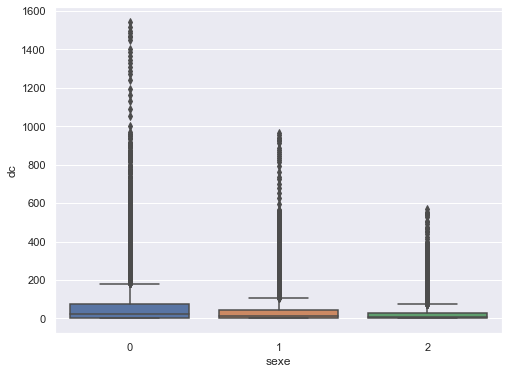

In [174]:
#box plot sexe/rad
var = 'sexe'
data = pd.concat([hospital_latest['dc'], hospital_latest[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="dc", data=data)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98]),
 <a list of 99 Text xticklabel objects>)

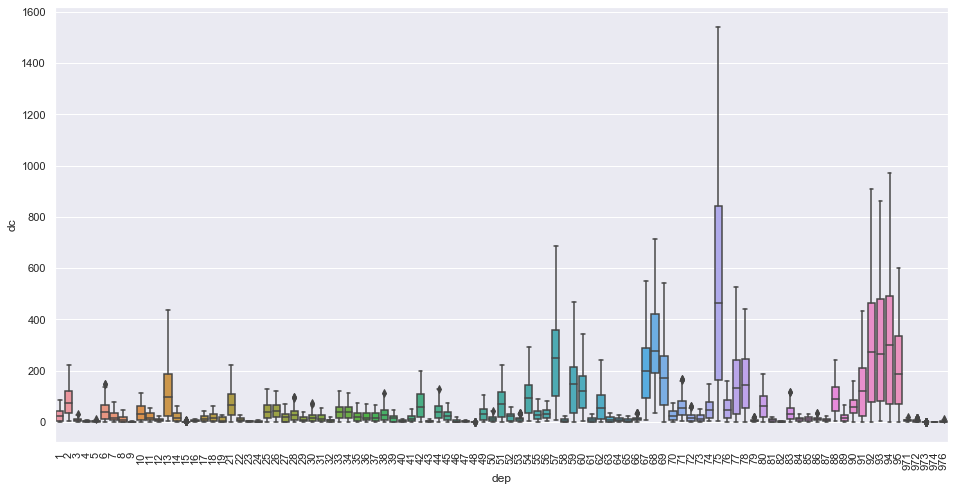

In [175]:
var = 'dep'
data = pd.concat([hospital_latest['dc'], hospital_latest[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="dc", data=data)
plt.xticks(rotation=90)

# 3.4 relation between variables

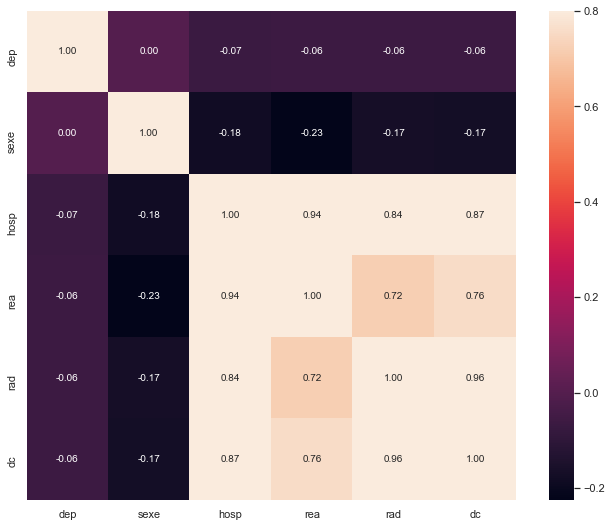

In [176]:
#correlation matrix
hospital_corr = hospital_latest.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(hospital_corr, vmax=.8, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10})

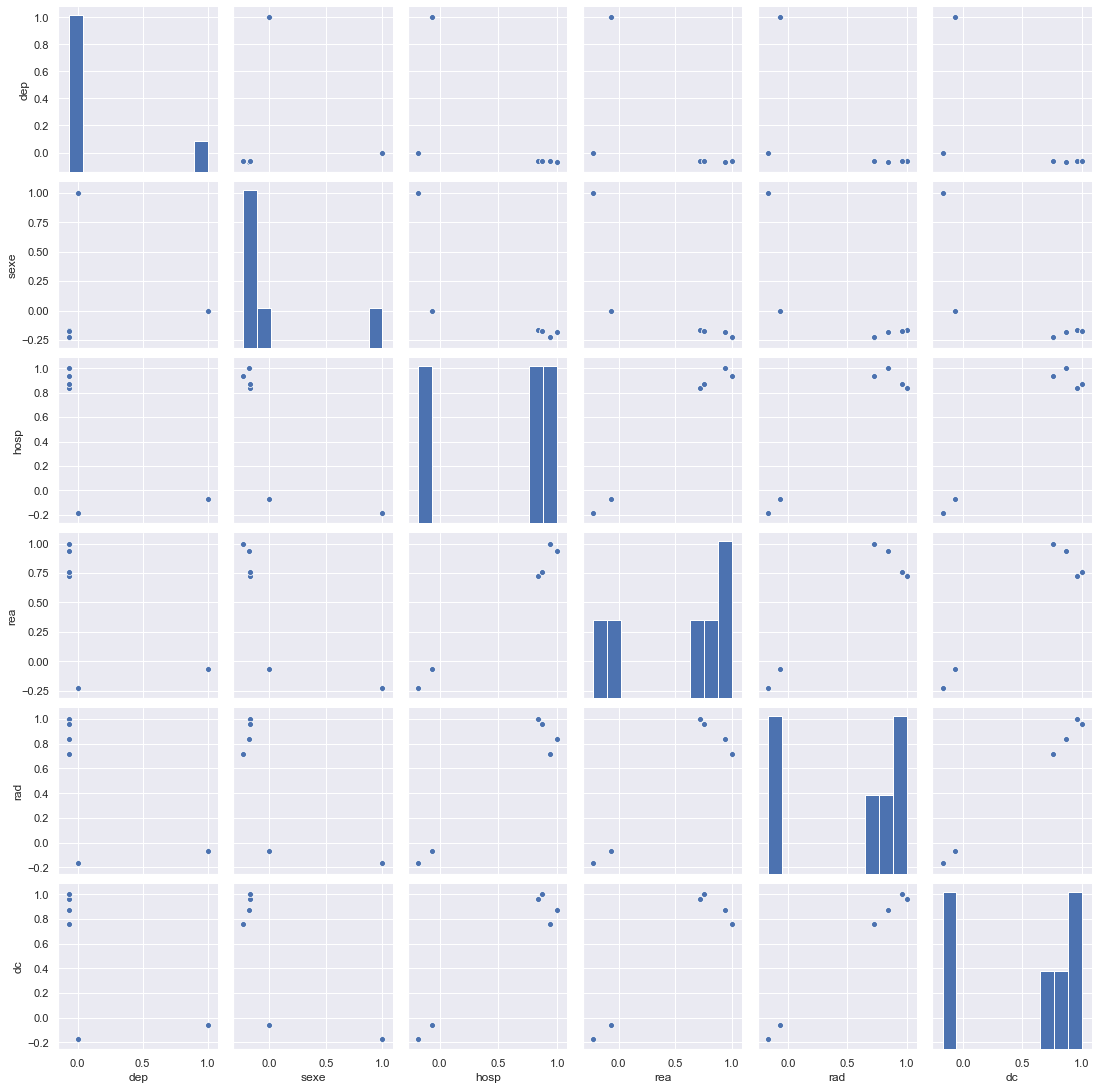

In [177]:
#scatterplot
sns.set()
cols = ['dep', 'sexe', 'hosp', 'rea', 'rad', 'dc']
sns.pairplot(hospital_corr[cols], size = 2.5)
plt.show()